<a href="https://colab.research.google.com/github/diego-gutierrez10/ProyectoFinal/blob/main/ProyectoFinal_PpCdD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Programación para Ciencia de Datos**

## Análisis del mercado laboral de AI & ML


## **¿De qué trata este proyecto?**

### Introducción

El boom de la Inteligencia Artificial y el Aprendizaje Automático en los últimos años ha incrementado drásticamente la demanda de profesionales en estás áreas, sobre todo en los Estados Unidos (2023). Como prueba un estudio realizado por Gran View Research afirma que:



> *El mercado de la Inteligencia Artificial fue de 196.63 billones de dólares en 2023, y se espera que crezca un 36.6% anualmente 2024 to 2030*

Artificial Intelligence Market Size, share & Trends Analysis Report by solution, by technology (Deep Learning, Machine Learning, NLP, Machine Vision, Generative AI), by function, by end-use, by region, and segment Forecasts, 2024 - 2030. (n.d.). https://www.grandviewresearch.com/industry-analysis/artificial-intelligence-ai-market#





### Acerca del DataFrame

**A continuación la descripción provista por los autores:**



---



The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:

* **work_year**: The year the salary was paid.
* **experience_level**: The experience level in the job during the year with the following possible values:
  * EN: Entry-level / Junior
  * MI: Mid-level / Intermediate
  * SE: Senior-level / Expert
  * EX: Executive-level / Director
* **employment_type**: The type of employement for the role:
  * PT: Part-time
  * FT: Full-time
  * CT: Contract
  * FL: Freelance
* **job_title**: The role worked in during the year.
* **salary**: The total gross salary amount paid.
* **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
  * 0: No remote work (less than 20%)
  * 50: Partially remote
  * 100: Fully remote (more than 80%)
* **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size**: The average number of people that worked for the company during the year:
  * S: less than 50 employees (small)
  * M: 50 to 250 employees (medium)
  * L: more than 250 employees (large)



### Preguntas a responder

1.  **¿Cómo ha cambiado el panorama del mercado laboral de la Inteligencia Artificial y el Aprendizaje Automático en los últimos años?**

2.  **¿Cual es el salario medio según el nivel de experiencia que requiere cada trabajo?**

3.  **¿Cual es el salario medio de este sector en mi país?**

4.  **¿Influye el tipo de trabajo (remoto o no) en el salario?**



## **Código**

### Importación y EDA (Exploratory Data Analysis)

Para empezar a trabjar importamos las librerías necesarias para la realización del programa, y leemos el DataFrame que utlizaremos mediante el método "read_csv" de la librería Pandas

In [ ]:
# Importación de las librerías

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random

salaries_df = pd.read_csv('/content/salaries.csv')

Imprimimos el tamaño del Dataframe y las primeras 10 columnas del mismo, para darnos una idea de como se ve distribuida la información

In [ ]:
#Impresión del tamaño mediante el método "shape" que nos devuelve un arreglo de 2 elementos con los renglones y las columnas respectivamente
print("El Dataframe \"salaries_df\" tiene una longitud de", salaries_df.shape[0], "renglones por", salaries_df.shape[1], "columnas\n")

print("Las primeras 10 columnas del Dataframe son:\n")

#Impresión de las 10 primeras columnas del dataframe mediante el método "head"
salaries_df.head(10)

El Dataframe "salaries_df" tiene una longitud de 18056 renglones por 11 columnas

Las primeras 10 columnas del Dataframe son:



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M
5,2024,SE,FT,Research Engineer,180000,USD,180000,US,0,US,S
6,2024,SE,FT,Research Engineer,160000,USD,160000,US,0,US,S
7,2024,SE,FT,Research Scientist,238600,USD,238600,US,0,US,M
8,2024,SE,FT,Research Scientist,112000,USD,112000,US,0,US,M
9,2024,SE,FT,Data Scientist,304000,USD,304000,US,0,US,M


Imprimimos el nombre y el tipo de data de cada columna

In [ ]:
print("Las columnas presentes en el dataframe son: \n")

salaries_df.dtypes

Las columnas presentes en el dataframe son: 



work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Manipulación de datos

Empezaremos creando una función que nos permita separar cada año en dataframes distintos guardándolos a través de un diccionario.

Para ello creamos una función llamada "year_segregator"

In [ ]:
def year_segregator(df):
  """Función que nos permite separar un dataframe distinto para cada año"""

  # Creación del arreglo years con los valores únicos en la columna "work_year"
  years = df['work_year'].unique()
  years.sort()

  # Inicialización de un diccionario vacío
  years_df = {}

  # Ciclo for para iterar en cada elmeneto del arreglo years
  for year in years:

    # Creación de un dataframe por cada año de la iteración
    year_df = df[df['work_year'] == year]

    # Agregación del dataframe de cada iteración al diccionario
    years_df[year] = year_df

  # Retorno del diccionario
  return years_df

Mandamos a llamar la función y guardamos su retorno en una nueva variable

In [ ]:
# LLamado de la función year_segregator
years_df = year_segregator(salaries_df)

# Impresión de un año aleatorio del diccionario
years_df[random.choice(salaries_df['work_year'].unique())]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2571,2022,MI,FT,AI Engineer,360000,ILS,107093,IL,100,IL,L
3068,2022,SE,FT,AI Architect,180000,USD,180000,HR,100,US,M
3217,2022,SE,FT,BI Analyst,133333,BRL,25804,BR,100,BR,M
6264,2022,SE,FT,Admin & Data Analyst,60000,USD,60000,IN,100,IN,M
9548,2022,EN,FT,AI Research Engineer,30000,GBP,36940,GB,100,GB,L
...,...,...,...,...,...,...,...,...,...,...,...
17804,2022,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L
17808,2022,EN,FT,Data Engineer,120000,USD,120000,US,100,US,M
17809,2022,SE,FT,Lead Machine Learning Engineer,80000,EUR,84053,DE,0,DE,M
17811,2022,EN,FT,Computer Vision Engineer,125000,USD,125000,US,0,US,M


Empezaremos analizando la evolución del salario medio global en dólares por año, mediante una función que nos permite obtener las medias anuales en una lista de tuplas con el año y su media salarial

In [ ]:
def yearly_avg(years_df):
  "Función que devuelve un arreglo con el año y el promedio anual por cada año del diccionario"

  # Inicialización de un arreglo vacío
  salaries_avg = []

  # Ciclo For para recorrer cada año del diccionario
  for year in years_df:

    # Agregación de la tupla con el año y el salario de cada iteración
    salaries_avg.append([year,int(years_df[year]['salary_in_usd'].mean())])

  # Retorno de la lista de tuplas
  return salaries_avg

Mandaremos a llamar la función para imprimir el salario de cada año

In [ ]:
# Creación de la variable "yearly" que tiene la lista que retorna el llamado de la función yearly_abg
yearly = yearly_avg(years_df)

for i in range(len(anios)):
  print("El salario medio en el", anio[i][0], "fue de", anio[i][1], "dólares")

El salario medio en el 2020 fue de 102250 dólares
El salario medio en el 2021 fue de 99922 dólares
El salario medio en el 2022 fue de 134349 dólares
El salario medio en el 2023 fue de 153732 dólares
El salario medio en el 2024 fue de 153170 dólares


Como podemos ver, el salario medio no tiene un patrón de evolución consistente, lo que nos indica que quizás están sesgados los datos.

Trataremos de separarlos por nivel de experiencia y tipo de trabajo para tener una comparación más justa.

Primero lo haremos en el Dataframe general.

In [ ]:
# Creación de un diccionario que almacena el nombre de la posición con las siglas como las llaves
exp_dict = {'MI': 'Mid-level / Intermediate', 'SE' : 'Senior-level / Expert', 'EN': 'Entry-level / Junior', 'EX': 'Executive-level / Director'}

# Ciclo for para recorrer cada nivel de experiencia del Dataframe
for i in salaries_df['experience_level'].unique():

  # Impresión del salario medio para cada nivel
  print("El salario medio para los", exp_dict[i], "es de", int(salaries_df[salaries_df['experience_level']==i]['salary_in_usd'].mean()))

El salario medio para los Mid-level / Intermediate es de 128971
El salario medio para los Senior-level / Expert es de 164845
El salario medio para los Entry-level / Junior es de 93027
El salario medio para los Executive-level / Director es de 197198


Ahora separaremos el dataframe original en dataframes individuales para cada nivel de experiencia y mandaremos a llamar la función yearly_avg

Mid-level / Intermediate

In [ ]:
# Creación del arreglo con la tupla del año y salario medio para los Mid-level / Intermediate
yearly_MI = yearly_avg(year_segregator(salaries_df[salaries_df['experience_level']=='MI']))

# Ciclo For para recorrer cada año en el arreglo
for i in range(len(yearly_MI)):
  # Impresión del salario medio para cada año
  print("El salario medio para los", exp_dict['MI'],"en el", yearly_MI[i][0], "fue de", yearly_MI[i][1], "dólares")

El salario medio para los Mid-level / Intermediate en el 2020 fue de 91870 dólares
El salario medio para los Mid-level / Intermediate en el 2021 fue de 86818 dólares
El salario medio para los Mid-level / Intermediate en el 2022 fue de 102745 dólares
El salario medio para los Mid-level / Intermediate en el 2023 fue de 123821 dólares
El salario medio para los Mid-level / Intermediate en el 2024 fue de 138620 dólares


Senior-level / Expert

In [ ]:
# Creación del arreglo con la tupla del año y salario medio para los Senior-level / Expert
yearly_SE = yearly_avg(year_segregator(salaries_df[salaries_df['experience_level']=='SE']))

# Ciclo For para recorrer cada año en el arreglo
for i in range(len(yearly_SE)):
  # Impresión del salario medio para cada año
  print("El salario medio para los", exp_dict['SE'],"en el", yearly_SE[i][0], "fue de", yearly_SE[i][1], "dólares")


El salario medio para los Senior-level / Expert en el 2020 fue de 138648 dólares
El salario medio para los Senior-level / Expert en el 2021 fue de 125989 dólares
El salario medio para los Senior-level / Expert en el 2022 fue de 147903 dólares
El salario medio para los Senior-level / Expert en el 2023 fue de 165421 dólares
El salario medio para los Senior-level / Expert en el 2024 fue de 169466 dólares


Entry-level / Junior

In [ ]:
# Creación del arreglo con la tupla del año y salario medio para los Entry-level / Junior
yearly_EN = yearly_avg(year_segregator(salaries_df[salaries_df['experience_level']=='EN']))

# Ciclo For para recorrer cada año en el arreglo
for i in range(len(yearly_EN)):
  # Impresión del salario medio para cada año
  print("El salario medio para los", exp_dict['EN'],"en el", yearly_EN[i][0], "fue de", yearly_EN[i][1], "dólares")

El salario medio para los Entry-level / Junior en el 2020 fue de 69840 dólares
El salario medio para los Entry-level / Junior en el 2021 fue de 63463 dólares
El salario medio para los Entry-level / Junior en el 2022 fue de 80018 dólares
El salario medio para los Entry-level / Junior en el 2023 fue de 91166 dólares
El salario medio para los Entry-level / Junior en el 2024 fue de 98199 dólares


Executive-level / Director

In [ ]:
# Creación del arreglo con la tupla del año y salario medio para los Executive-level / Director
yearly_EX = yearly_avg(year_segregator(salaries_df[salaries_df['experience_level']=='EX']))

# Ciclo For para recorrer cada año en el arreglo
for i in range(len(yearly_EX)):
  # Impresión del salario medio para cada año
  print("El salario medio para los", exp_dict['EX'],"en el", yearly_EX[i][0], "fue de", yearly_EX[i][1], "dólares")

El salario medio para los Executive-level / Director en el 2020 fue de 179958 dólares
El salario medio para los Executive-level / Director en el 2021 fue de 186128 dólares
El salario medio para los Executive-level / Director en el 2022 fue de 188260 dólares
El salario medio para los Executive-level / Director en el 2023 fue de 191314 dólares
El salario medio para los Executive-level / Director en el 2024 fue de 205915 dólares


Como podemos ver, ya tenemos los salarios medios anuales para cada posición. Sin embargo, esta no es la mejor manera para presentar la información, y no resulta tan atractiva visualmente. Por lo que trataremos de mejorar esto con gráficas de Seaborn y Matplotlib.

Para ello crearemos un Dataframe a partir de las listas de tuplas generadas

In [ ]:
# Formateo de los datos a ingresar en el Dataframe
total_yearly = {'year': [2020, 2021, 2022, 2023, 2024], 'avg_MI': [yearly_MI[0][1], yearly_MI[1][1], yearly_MI[2][1], yearly_MI[3][1], yearly_MI[4][1]], 'avg_SE': [yearly_SE[0][1], yearly_SE[1][1], yearly_SE[2][1], yearly_SE[3][1], yearly_SE[4][1]], 'avg_EN': [yearly_EN[0][1], yearly_EN[1][1], yearly_EN[2][1], yearly_EN[3][1], yearly_EN[4][1]], 'avg_EX': [yearly_EX[0][1], yearly_EX[1][1], yearly_EX[2][1], yearly_EX[3][1], yearly_EX[4][1]]}

# Creación de un DataFrame a partir de los datos de la media salarial anual
total_yearly_df = pd.DataFrame(total_yearly)

# Reasignación de los años como el índice del DataFrame
total_yearly_df = total_yearly_df.set_index('year')

# Impresión del DataFrame resultante
total_yearly_df

,avg_MI,avg_SE,avg_EN,avg_EX
year,,,,
2020,91870,138648,69840,179958
2021,86818,125989,63463,186128
2022,102745,147903,80018,188260
2023,123821,165421,91166,191314
2024,138620,169466,98199,205915


Ahora que tenemos un nuevo DataFrame con la información que necesitamos es más fácil trabajar la información para obtener las gráficas

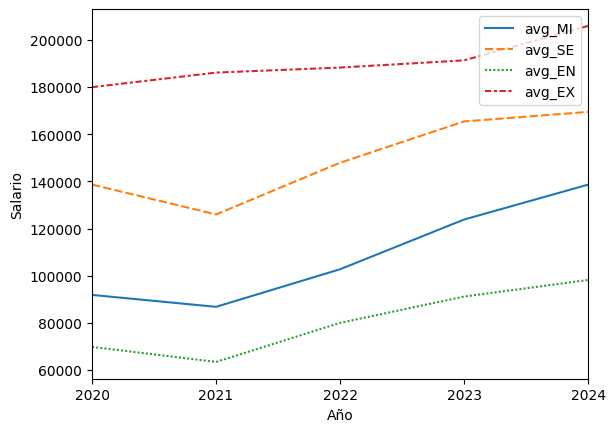

In [ ]:
# Inicialización de los plots
fig, ax = plt.subplots()

# Creación del gráfica de líneas con 4 líneas, una por cada columna
sns.lineplot(data=total_yearly_df[['avg_MI', 'avg_SE', 'avg_EN', 'avg_EX']], ax=ax)

# Configuración de las leyendas del eje X para mostrar el año correspondiente
ax.set_xlim(2020,2024)
ax.set_xticks(range(2020,2025))

# Asignación de las etiquetas de los ejes X y Y respectivamente
plt.xlabel("Año")
plt.ylabel('Salario')

# Impresión del gráfico resultante
plt.show()

Como podemos ver, los salarios de la mayoría de los trbajadores de la industria disminuyeron un poco en 2021. Quizás por la caída en la alta demanda de programadores que había en 2020 derivado de la pandemia.

A partir de 2022 podemos ver que el incremento salarial generalizado regresó y se ha manteido de forma sostenida desde entonces.

Ahora analizaremos los cuartiles de los salarios de todos los años de cada nivel de experiencia con la herramienta "boxplot" o de gráfico de bigotes

<Axes: ylabel='salary_in_usd'>

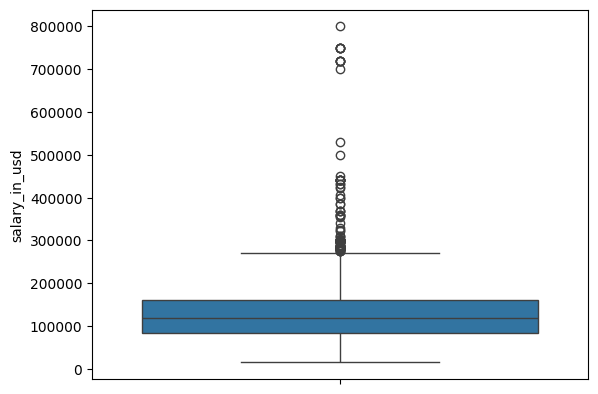

In [ ]:
sns.boxplot(data=salaries_df[salaries_df['experience_level']=='MI']['salary_in_usd'])

El boxplot nos generea en donde se encuentran cada cuartil salarial para los Mid-level / Intermediate.

Como podemos ver, la media salarial se encuentra ligeramente arriba de los 100,000 dólares, y el 25 % de personas con los mayores salarios en este nivel ganan entre 150,000 y 250,000 dólares. Sin embargo, podmos ver que hay personas que ganan hasta 800,000 dólares! 🤑

Vamos a ver quienes son las 10 personas que más ganan filtrando el Dataframe

In [ ]:
salaries_df[salaries_df['experience_level']=='MI'].sort_values(by=['salary_in_usd'], ascending=False).head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4326,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
6144,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
7934,2023,MI,FT,Machine Learning Engineer,750000,USD,750000,US,0,US,M
7928,2023,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
7330,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
8912,2023,MI,FT,Data Engineer,750000,USD,750000,US,0,US,M
7374,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
5177,2024,MI,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
7360,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
7370,2024,MI,FT,Research Scientist,720000,USD,720000,US,0,US,M


Continuamos con las demás gráficas de bigote.

Ahora con la de Senior-level / Expert

<Axes: ylabel='salary_in_usd'>

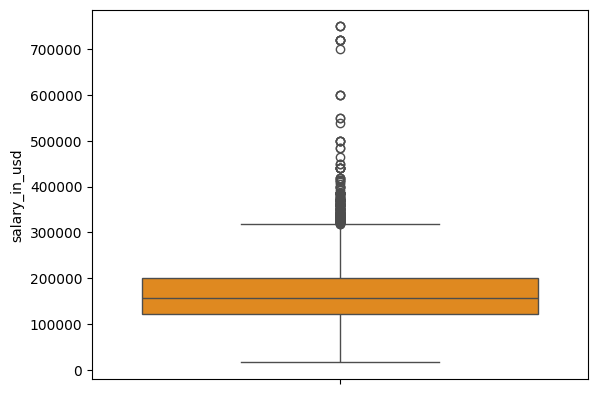

In [ ]:
sns.boxplot(data=salaries_df[salaries_df['experience_level']=='SE']['salary_in_usd'], color='#ff8c00')

El boxplot nos generea en donde se encuentran cada cuartil salarial para los Senior-level / Expert.

Como podemos ver, la media salarial se encuentra ligeramente arriba de los 150,000 dólares, y el 25 % de personas con los mayores salarios en este nivel ganan entre 200,000 y 300,000 dólares.

Entry-level / Junior

<Axes: ylabel='salary_in_usd'>

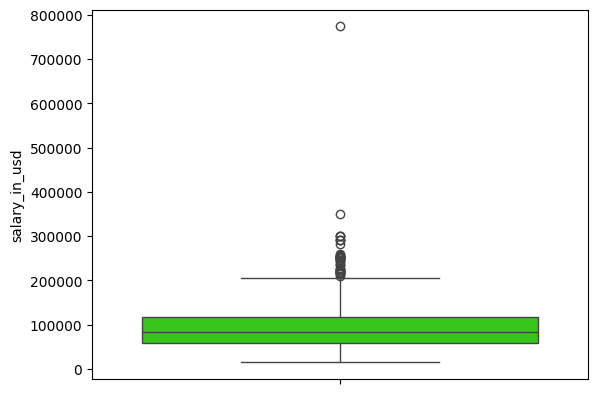

In [ ]:
sns.boxplot(data=salaries_df[salaries_df['experience_level']=='EN']['salary_in_usd'], color='#24e100')

Executive-level / Director

<Axes: ylabel='salary_in_usd'>

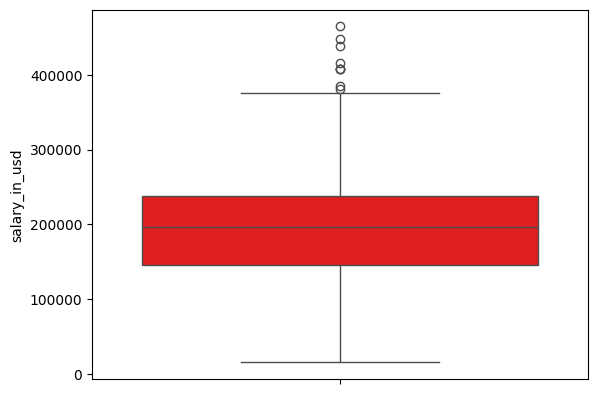

In [ ]:
sns.boxplot(data=salaries_df[salaries_df['experience_level']=='EX']['salary_in_usd'], color='red')

El boxplot nos generea en donde se encuentran cada cuartil salarial para los Executive-level / Director

Este es el nivel con los mejores salarios, en donde la media se encuentra ligeramente debajo de los 200,000 dólares, y el 25 % de personas con los mayores salarios en este nivel ganan entre 250,000 y 400,000 dólares.

Ya creamos los boxplots individuales para cada nivel de experiencia, no obstante, una manera más útil de visualizarlos es tenerlos todos en una misma gráfica para poder compararlos más fácilmente, lo cual haremos a continuación.

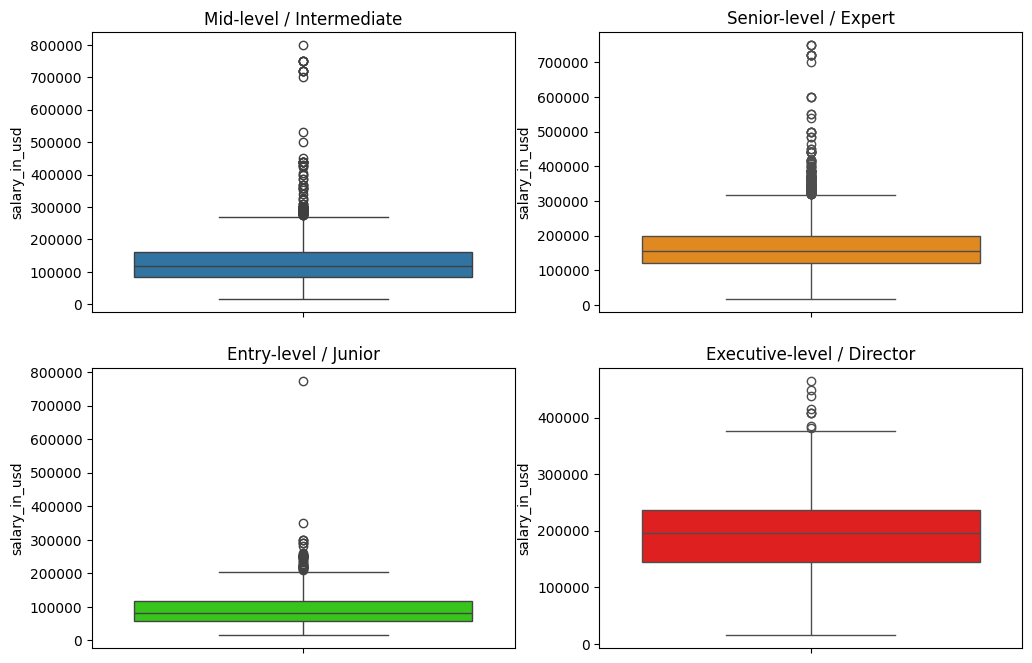

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(data=salaries_df[salaries_df['experience_level'] == 'MI']['salary_in_usd'], ax=axs[0, 0])
axs[0, 0].set_title('Mid-level / Intermediate')

# Crear el segundo boxplot
sns.boxplot(data=salaries_df[salaries_df['experience_level'] == 'SE']['salary_in_usd'], ax=axs[0, 1], color='#ff8c00')
axs[0, 1].set_title('Senior-level / Expert')

# Crear el tercer boxplot
sns.boxplot(data=salaries_df[salaries_df['experience_level'] == 'EN']['salary_in_usd'], ax=axs[1, 0], color='#24e100')
axs[1, 0].set_title('Entry-level / Junior')

# Crear el cuarto boxplot
sns.boxplot(data=salaries_df[salaries_df['experience_level'] == 'EX']['salary_in_usd'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Executive-level / Director')


plt.show()

Ahora nos enfocaremos en analizar los salarios por país, iterando sobre ellos con un ciclo for y guardándo su media en un diccionario

In [ ]:
# Inicialización del diccionario vacío
countries_avg = []

# Ciclo For para recorrer cada país único del arreglo
for i in salaries_df['company_location'].unique():

  # Asignación de la media de cada país al diccionario con las llaves de las siglas de cada país
  countries_avg.append([i,int(salaries_df[salaries_df['company_location']==i]['salary_in_usd'].mean())])

# Impresión de los top 10 países más
print(countries_avg)

[['CA', 143732], ['US', 157844], ['GB', 91919], ['FR', 89148], ['DE', 102091], ['ES', 57393], ['SE', 96909], ['MX', 118447], ['IE', 99341], ['PL', 85281], ['IN', 42452], ['AU', 127800], ['NL', 75759], ['LT', 61942], ['DK', 60776], ['ZA', 53488], ['NZ', 146761], ['AR', 62444], ['KE', 50000], ['LV', 57059], ['IL', 189772], ['FI', 65370], ['AT', 65862], ['BR', 54794], ['CH', 124646], ['AE', 86000], ['SA', 139999], ['UA', 105600], ['EG', 140869], ['PH', 49046], ['TR', 23094], ['OM', 46848], ['PT', 50253], ['BA', 75000], ['IT', 49600], ['AS', 31684], ['EE', 45588], ['MT', 50423], ['HU', 39938], ['LB', 71750], ['RO', 44713], ['VN', 63000], ['NG', 60444], ['LU', 47609], ['GI', 79976], ['CO', 79115], ['SI', 56186], ['GR', 52260], ['MU', 100000], ['RU', 78207], ['KR', 47000], ['CZ', 69478], ['QA', 300000], ['GH', 27000], ['AD', 50745], ['EC', 16000], ['NO', 88462], ['JP', 110821], ['HK', 65058], ['CF', 49216], ['SG', 62783], ['TH', 22971], ['HR', 76726], ['AM', 50000], ['PK', 30000], ['IR', 100

Ahora ya tenemos un arreglo de tuplas con el código del país y su salario medio. Para hacerlo más legible vamos a utilizar la librería "country_converter" que instalaremos mediante pip

In [ ]:
# Ejecución de pip para instalar la librería "country_converter" e importación de la misma
!pip install country_converter
import country_converter as coco

In [ ]:
# Ciclo For para recorrer las siglas de cada país de countries_avg
for i in range(len(countries_avg)):

  # Reasignación del nombre completo a las siglas de cada país
  countries_avg[i][0] = coco.convert(names = countries_avg[i][0], to = 'name_short')

# Impresión del Dataframe resultante
print(countries_avg)

[['Canada', 143732], ['United States', 157844], ['United Kingdom', 91919], ['France', 89148], ['Germany', 102091], ['Spain', 57393], ['Sweden', 96909], ['Mexico', 118447], ['Ireland', 99341], ['Poland', 85281], ['India', 42452], ['Australia', 127800], ['Netherlands', 75759], ['Lithuania', 61942], ['Denmark', 60776], ['South Africa', 53488], ['New Zealand', 146761], ['Argentina', 62444], ['Kenya', 50000], ['Latvia', 57059], ['Israel', 189772], ['Finland', 65370], ['Austria', 65862], ['Brazil', 54794], ['Switzerland', 124646], ['United Arab Emirates', 86000], ['Saudi Arabia', 139999], ['Ukraine', 105600], ['Egypt', 140869], ['Philippines', 49046], ['Türkiye', 23094], ['Oman', 46848], ['Portugal', 50253], ['Bosnia and Herzegovina', 75000], ['Italy', 49600], ['American Samoa', 31684], ['Estonia', 45588], ['Malta', 50423], ['Hungary', 39938], ['Lebanon', 71750], ['Romania', 44713], ['Vietnam', 63000], ['Nigeria', 60444], ['Luxembourg', 47609], ['Gibraltar', 79976], ['Colombia', 79115], ['Sl

Como podemos ver, ya tenemos almacenada la información de la media salarial de cada país.

Ahora crearemos una función que nos permita saber la la media salarial de un país ingresado por el usuario mediante un diccionario

In [ ]:
# Variable Country que guarda el nombre del país del que el usuario desea conocer la media salarial
country = input("¿De qué país desea conocer su salario? (en inglés): ")

# Creación de un diccionario a través de una lista anidada (lista de tuplas)
countries_avg_dict = dict(countries_avg)

# Impresión del mensaje
print("El salrio medio en", country, "es de", countries_avg_dict[country], "dólares")

¿De qué país desea conocer su salario? (en inglés): France
El salrio medio en France es de 89148 dólares


A continuación realizaremos una comparación de los salarios según la flexibilidad laboral, si es un trabajo que se puede hacer de manera remota o no

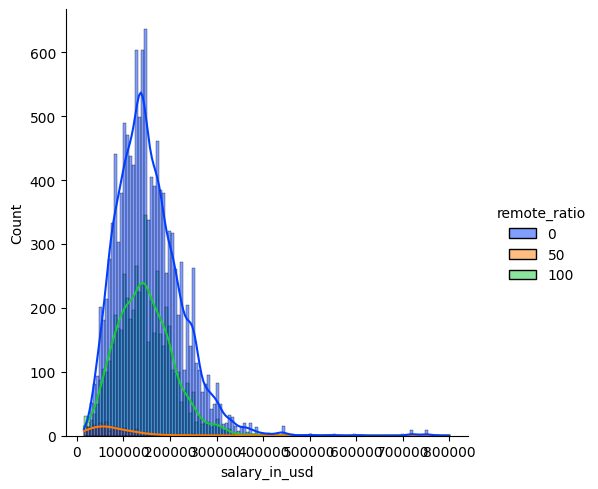

In [ ]:
sns.displot(data=salaries_df, x='salary_in_usd', hue='remote_ratio', palette='bright', kde=True)

Es interesante ver como la gráfica nos indica que prácticamente no hay diferencia en los salarios entre los que trabajan completamente presencial o los que trabajan completamente remotos, pero que los que están en una modalidad híbrida suelen ganar un poco menos

Ahora haremos una comparación similar pero de los salarios de las compañías pequeñas, medianas y grandes

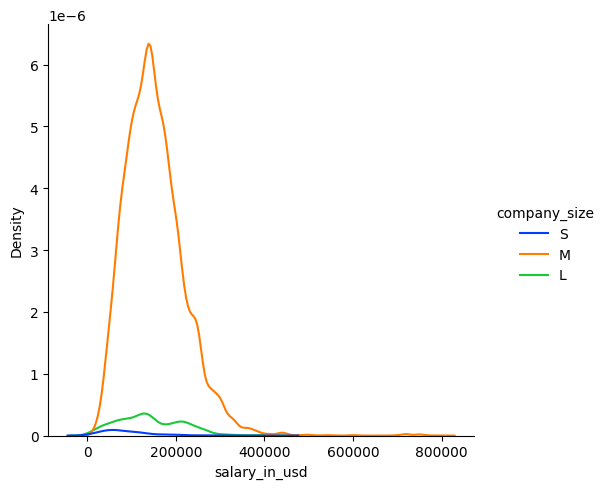

In [ ]:
sns.displot(data=salaries_df, x='salary_in_usd', hue='company_size', palette='bright', kind='kde')

No hay una comparativa que resalte a la vista para los salarios según el tamaño de la compañía en que se labora. Quizás que la línea de las compañías grandes tiene una menor curtosis, que podría ser que tienen una mayor diversidad de posiciones y mejor distribución salarial.

Lo que si nos podemos dar cuenta es que las compañias pequeñas son pocas y suelen tener los peores salarios 🥹

## **Gracias por utilizar este Notebook, espero que haya sido de su agrado 😃**



---


## **Diego Alejandro Gutiérrez Rios**
**diego.gutierrez10@uabc.edu.mx**

TODOS LOS DERECHOS RESEVADOS ©